In [1]:
from sklearn import datasets
digit_dataset = datasets.load_digits()
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
digit_dataset["images"].shape

(1797, 8, 8)

In [3]:
digit_dataset["target"][0]

0

In [4]:
digit_dataset["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

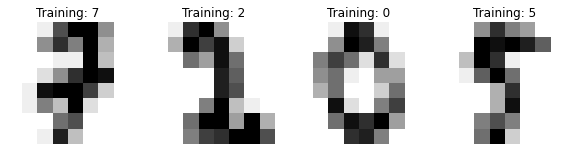

In [5]:
import matplotlib.pyplot as plt
from random import randint
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))  # (1)

for ax in axes:  # (2)
    num = randint(1, 1000)  # (3)
    image = digit_dataset["images"][num]
    label = digit_dataset["target"][num]    
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')  # (4)
    ax.set_title('Training: %i' % label)

In [6]:
digit_dataset["data"][0].shape

(64,)

In [7]:
from sklearn.model_selection import train_test_split

X = digit_dataset["data"]   # (1)
y = digit_dataset["target"]   # (1)
X_train, X_test, y_train, y_test = train_test_split(X, y)   # (2)

In [8]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class="ovr")
logreg_softmax = LogisticRegression(multi_class="multinomial", solver="sag")

logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

C:\Miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(multi_class='multinomial', solver='sag')

In [9]:
from sklearn.metrics import confusion_matrix
y_pred = logreg_ovr.predict(X_test).copy()
y_true = y_test.copy()
confusion_matrix(y_true, y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1, 41,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  2,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 41,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 44,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  1, 50]], dtype=int64)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       0.98      0.98      0.98        50
           2       0.98      0.96      0.97        51
           3       0.95      0.95      0.95        39
           4       0.91      1.00      0.95        41
           5       0.98      0.91      0.94        45
           6       0.97      0.95      0.96        38
           7       1.00      0.95      0.98        43
           8       0.96      1.00      0.98        44
           9       0.96      0.96      0.96        52

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [11]:
result = confusion_matrix(y_true, y_pred)
result.diagonal().sum() / result.sum(axis=0).sum()

0.9666666666666667

In [12]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average="micro") 

0.9666666666666667

In [13]:
precision_score(y_true, y_pred, average="macro") 

0.9666219376328072

In [14]:
precision_score(y_true, y_pred, average=None)

array([0.97916667, 0.98      , 0.98      , 0.94871795, 0.91111111,
       0.97619048, 0.97297297, 1.        , 0.95652174, 0.96153846])